In [ ]:
pip install wbdata

In [79]:
import wbdata
import datetime
import pandas as pd

In [80]:
wbdata.get_country()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

In [81]:
#wbdata.get_country(300) # list of countries
LAMcountries=['ARG','BLZ','BOL','BRA','CHL','COL','CRI','CUB','SLV','GTM','GUY','HTI','HND',
          'JAM','MEX','NIC','PAN','PRY','PER','PRI','SUR','URY','VEN']
NAMcountries=['USA','CAN']
#regions=['LCN','WLD','NAC']
#WORLD = WLD; LAT AM AND CARRIBEAN = LCN;
#NAC=North America
regions=['NAC','WLD','LCN']
allcountries=LAMcountries+NAMcountries
allregions=allcountries+regions

In [82]:
allregions=country=('BE','BG','CZ','DK','DE','EE','IE','GR','ES','FR','HR','IT','CY','LV','LT','LU',
                                    'HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE','GBR')

In [83]:
wbdata.get_topic()

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

In [84]:
wbdata.get_indicator(topic=19)

id                    name
--------------------  ------------------------------------------------------------------------------------------
AG.LND.AGRI.K2        Agricultural land (sq. km)
AG.LND.AGRI.ZS        Agricultural land (% of land area)
AG.LND.ARBL.ZS        Arable land (% of land area)
AG.LND.EL5M.RU.K2     Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS     Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.UR.K2     Urban land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.UR.ZS     Urban land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.ZS        Land area where elevation is below 5 meters (% of total land area)
AG.LND.FRST.K2        Forest area (sq. km)
AG.LND.FRST.ZS        Forest area (% of land area)
AG.LND.IRIG.AG.ZS     Agricultural irrigated land (% of total agricultural land)
AG.LND.PRCP.MM        Average precipitation in depth (mm per year)
AG.YLD.CREL.KG      

In [123]:
indicators={ "SP.POP.GROW":        "Population ",
"EN.ATM.CO2E.LF.ZS":    "CO2 emissions from liquid fuel consumption",
    "EN.ATM.CO2E.PC":  "CO2 emissions (metric tons per capita) ",
    "EN.ATM.CO2E.PP.GD":    "CO2 emissions (kg per PPP $ of GDP)",
       "EN.ATM.CO2E.SF.KT":"CO2 emissions from solid fuel consumption (kt)",
            "EN.ATM.CO2E.SF.ZS":"CO2 emissions from solid fuel consumption (% of total)",
            "SP.POP.TOTL": "Population, total"
    }

In [124]:
dtframe=wbdata.get_dataframe(indicators,country=allregions)

In [125]:
dtframe2= dtframe.copy() #creates a copy of dataframe; if you instead  do dtframe2=dtframe all changes to dtframe2 will impact dtframe
dtframe2.reset_index(inplace=True)

In [126]:
dtframe2['text']=dtframe2['country']+dtframe2['date'].map(str)

In [127]:
dtframe2.tail

<bound method NDFrame.tail of       country  date  Population   CO2 emissions from liquid fuel consumption  \
0     Austria  2022     0.963775                                         NaN   
1     Austria  2021     0.435672                                         NaN   
2     Austria  2020     0.415177                                         NaN   
3     Austria  2019     0.444674                                         NaN   
4     Austria  2018     0.487072                                         NaN   
...       ...   ...          ...                                         ...   
1759   Sweden  1964     0.747117                                   82.512136   
1760   Sweden  1963     0.563634                                   81.112583   
1761   Sweden  1962     0.551535                                   80.095735   
1762   Sweden  1961     0.471081                                   77.668518   
1763   Sweden  1960          NaN                                   76.584966   

      CO2

In [128]:
dtframe2.info()

<class 'wbdata.api.WBDataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   country                                                 1764 non-null   object 
 1   date                                                    1764 non-null   object 
 2   Population                                              1736 non-null   float64
 3   CO2 emissions from liquid fuel consumption              1337 non-null   float64
 4   CO2 emissions (metric tons per capita)                  868 non-null    float64
 5   CO2 emissions (kg per PPP $ of GDP)                     840 non-null    float64
 6   CO2 emissions from solid fuel consumption (kt)          1337 non-null   float64
 7   CO2 emissions from solid fuel consumption (% of total)  1337 non-null   float64
 8   Population, total                          

In [129]:
dfnas=dtframe2.isnull()
dfnas

,country,date,Population,CO2 emissions from liquid fuel consumption,CO2 emissions (metric tons per capita),CO2 emissions (kg per PPP $ of GDP),CO2 emissions from solid fuel consumption (kt),CO2 emissions from solid fuel consumption (% of total),"Population, total",text
0,False,False,False,True,True,True,True,True,False,False
1,False,False,False,True,True,True,True,True,False,False
2,False,False,False,True,False,False,True,True,False,False
3,False,False,False,True,False,False,True,True,False,False
4,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1759,False,False,False,False,True,True,False,False,False,False
1760,False,False,False,False,True,True,False,False,False,False
1761,False,False,False,False,True,True,False,False,False,False
1762,False,False,False,False,True,True,False,False,False,False


In [130]:
dtframe2=dtframe2.dropna()

In [131]:
dtframe2.tail

<bound method NDFrame.tail of       country  date  Population   CO2 emissions from liquid fuel consumption  \
6     Austria  2016     1.081396                                   49.396613   
7     Austria  2015     1.120993                                   48.939788   
8     Austria  2014     0.781542                                   49.169389   
9     Austria  2013     0.589387                                   48.131118   
10    Austria  2012     0.455937                                   47.624254   
...       ...   ...          ...                                         ...   
1729   Sweden  1994     0.710705                                   69.753876   
1730   Sweden  1993     0.580839                                   68.187641   
1731   Sweden  1992     0.586530                                   67.899270   
1732   Sweden  1991     0.681643                                   71.210382   
1733   Sweden  1990     0.772603                                   71.930937   

      CO2

In [132]:
dtframe2.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany',
       'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Croatia', 'Hungary', 'Ireland',
       'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic',
       'Slovenia', 'Sweden'], dtype=object)

In [133]:
dtframe2.query("country == 'Austria'")
dtframe2.query("country == 'Sweden'")
dtframe2.query("country == 'Belgium'")
dtframe2.query("country == 'Bulgaria'")
dtframe2.query("country == 'Ireland'")
dtframe2.query("country == 'Poland'")

,country,date,Population,CO2 emissions from liquid fuel consumption,CO2 emissions (metric tons per capita),CO2 emissions (kg per PPP $ of GDP),CO2 emissions from solid fuel consumption (kt),CO2 emissions from solid fuel consumption (% of total),"Population, total",text
1392,Poland,2016,-0.042985,22.103052,7.895752,0.280331,191399.065,63.855029,37970087.0,Poland2016
1393,Poland,2015,-0.066641,20.294412,7.610021,0.283716,187838.408,64.984746,37986412.0,Poland2015
1394,Poland,2014,-0.074846,19.622185,7.516889,0.296919,191395.398,66.982361,38011735.0,Poland2014
1395,Poland,2013,-0.060360,19.109995,7.841821,0.322445,206584.112,69.246845,38040196.0,Poland2013
1396,Poland,2012,-0.000239,21.003503,7.969684,0.337854,197005.908,64.943434,38063164.0,Poland2012
1397,Poland,2011,0.053770,21.400574,8.159933,0.360129,211893.928,68.223036,38063255.0,Poland2011
1398,Poland,2010,-0.285609,20.923897,8.247005,0.394787,213529.410,68.059352,38042794.0,Poland2010
1399,Poland,2009,0.067763,20.995876,7.791555,0.404964,200049.518,67.297826,38151603.0,Poland2009
1400,Poland,2008,0.013637,20.768407,8.087060,0.441835,213430.401,69.223664,38125759.0,Poland2008
1401,Poland,2007,-0.054305,19.543213,8.220640,0.489179,215854.288,68.881606,38120560.0,Poland2007


In [134]:
dtframe2 = dtframe2.rename(columns={'date': 'Year', 'country': 'Country'})

In [135]:
dtframe2

,Country,Year,Population,CO2 emissions from liquid fuel consumption,CO2 emissions (metric tons per capita),CO2 emissions (kg per PPP $ of GDP),CO2 emissions from solid fuel consumption (kt),CO2 emissions from solid fuel consumption (% of total),"Population, total",text
6,Austria,2016,1.081396,49.396613,7.290777,0.138387,11393.369,17.973448,8736668.0,Austria2016
7,Austria,2015,1.120993,48.939788,7.318860,0.146771,12266.115,19.423777,8642699.0,Austria2015
8,Austria,2014,0.781542,49.169389,7.260931,0.148790,11415.371,18.414859,8546356.0,Austria2014
9,Austria,2013,0.589387,48.131118,7.754018,0.161805,12530.139,19.057246,8479823.0,Austria2013
10,Austria,2012,0.455937,47.624254,7.723852,0.166257,12310.119,18.906649,8429991.0,Austria2012
...,...,...,...,...,...,...,...,...,...,...
1729,Sweden,1994,0.710705,69.753876,6.661029,0.304292,11294.360,19.309899,8780745.0,Sweden1994
1730,Sweden,1993,0.580839,68.187641,6.480989,0.312048,10403.279,18.409625,8718561.0,Sweden1993
1731,Sweden,1992,0.586530,67.899270,6.546546,0.314180,9757.887,17.194515,8668067.0,Sweden1992
1732,Sweden,1991,0.681643,71.210382,6.293831,0.303571,10293.269,18.977266,8617375.0,Sweden1991


In [136]:
# Function of change year
def change_year_type(dtframe2):

    #print("Changing type of Year for: " + dtframe.loc[0]['Country'])
    # validation to check if year column exists in the dataframe
    if 'Year' in dtframe2.columns:
        # convert year to a string
        dtframe['Year'] = dtframe2.Year.astype(str)

    print("Completed changing type")
    # return the dtframe
    return dtframe2

In [137]:
dtframe2['Year'] = dtframe2.Year.astype(str)

In [138]:
dtframe2

,Country,Year,Population,CO2 emissions from liquid fuel consumption,CO2 emissions (metric tons per capita),CO2 emissions (kg per PPP $ of GDP),CO2 emissions from solid fuel consumption (kt),CO2 emissions from solid fuel consumption (% of total),"Population, total",text
6,Austria,2016,1.081396,49.396613,7.290777,0.138387,11393.369,17.973448,8736668.0,Austria2016
7,Austria,2015,1.120993,48.939788,7.318860,0.146771,12266.115,19.423777,8642699.0,Austria2015
8,Austria,2014,0.781542,49.169389,7.260931,0.148790,11415.371,18.414859,8546356.0,Austria2014
9,Austria,2013,0.589387,48.131118,7.754018,0.161805,12530.139,19.057246,8479823.0,Austria2013
10,Austria,2012,0.455937,47.624254,7.723852,0.166257,12310.119,18.906649,8429991.0,Austria2012
...,...,...,...,...,...,...,...,...,...,...
1729,Sweden,1994,0.710705,69.753876,6.661029,0.304292,11294.360,19.309899,8780745.0,Sweden1994
1730,Sweden,1993,0.580839,68.187641,6.480989,0.312048,10403.279,18.409625,8718561.0,Sweden1993
1731,Sweden,1992,0.586530,67.899270,6.546546,0.314180,9757.887,17.194515,8668067.0,Sweden1992
1732,Sweden,1991,0.681643,71.210382,6.293831,0.303571,10293.269,18.977266,8617375.0,Sweden1991


In [139]:
df_copy=dtframe2.drop(['Year', 'Country'], axis='columns')
df_copy.describe()

,Population,CO2 emissions from liquid fuel consumption,CO2 emissions (metric tons per capita),CO2 emissions (kg per PPP $ of GDP),CO2 emissions from solid fuel consumption (kt),CO2 emissions from solid fuel consumption (% of total),"Population, total"
count,721.000000,721.000000,721.000000,721.000000,721.00000,721.000000,7.210000e+02
mean,0.250189,47.261565,8.099867,0.397554,45612.35332,29.103303,1.787134e+07
std,0.777991,20.104294,3.807137,0.253850,76080.51368,20.638732,2.219743e+07
min,-3.847671,3.196994,2.926895,0.074795,0.00000,0.000000,3.541700e+05
25%,-0.129440,34.609713,5.771090,0.226750,8071.06700,14.720573,3.866243e+06
50%,0.287421,47.015707,7.518740,0.325283,17396.24800,24.889140,8.857874e+06
75%,0.602938,58.135670,9.729463,0.493939,40135.31500,39.472442,1.998369e+07
max,2.890960,103.011908,30.370543,1.791743,445782.52200,96.172264,8.253418e+07


In [140]:
import pandas as pd
import numpy as np
import requests

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-156-daf34abb0ff6>:8: FutureWarning: The default value of numeric_only in WBDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned_us_copy.corr(), cmap='gist_yarg', center=0,ax=ax)


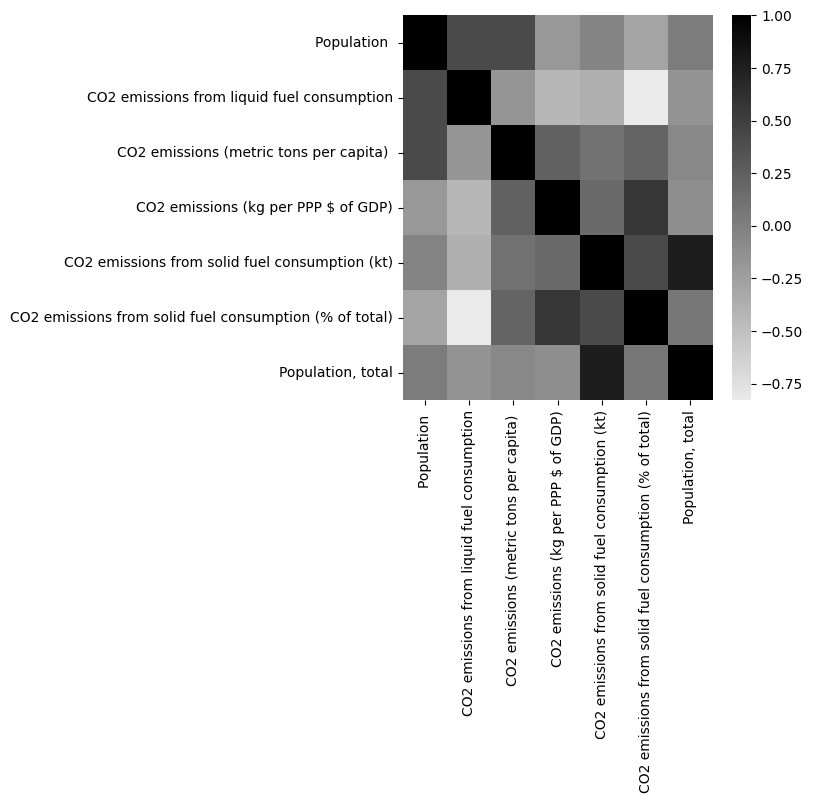

In [156]:
# produced a copy
df_cleaned_us_copy=dtframe2.copy()
#categorical features from the matrix
df_cleaned_us_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df_cleaned_us_copy.corr(), cmap='gist_yarg', center=0,ax=ax)
plt.savefig('correlation_us.png')
plt.show()

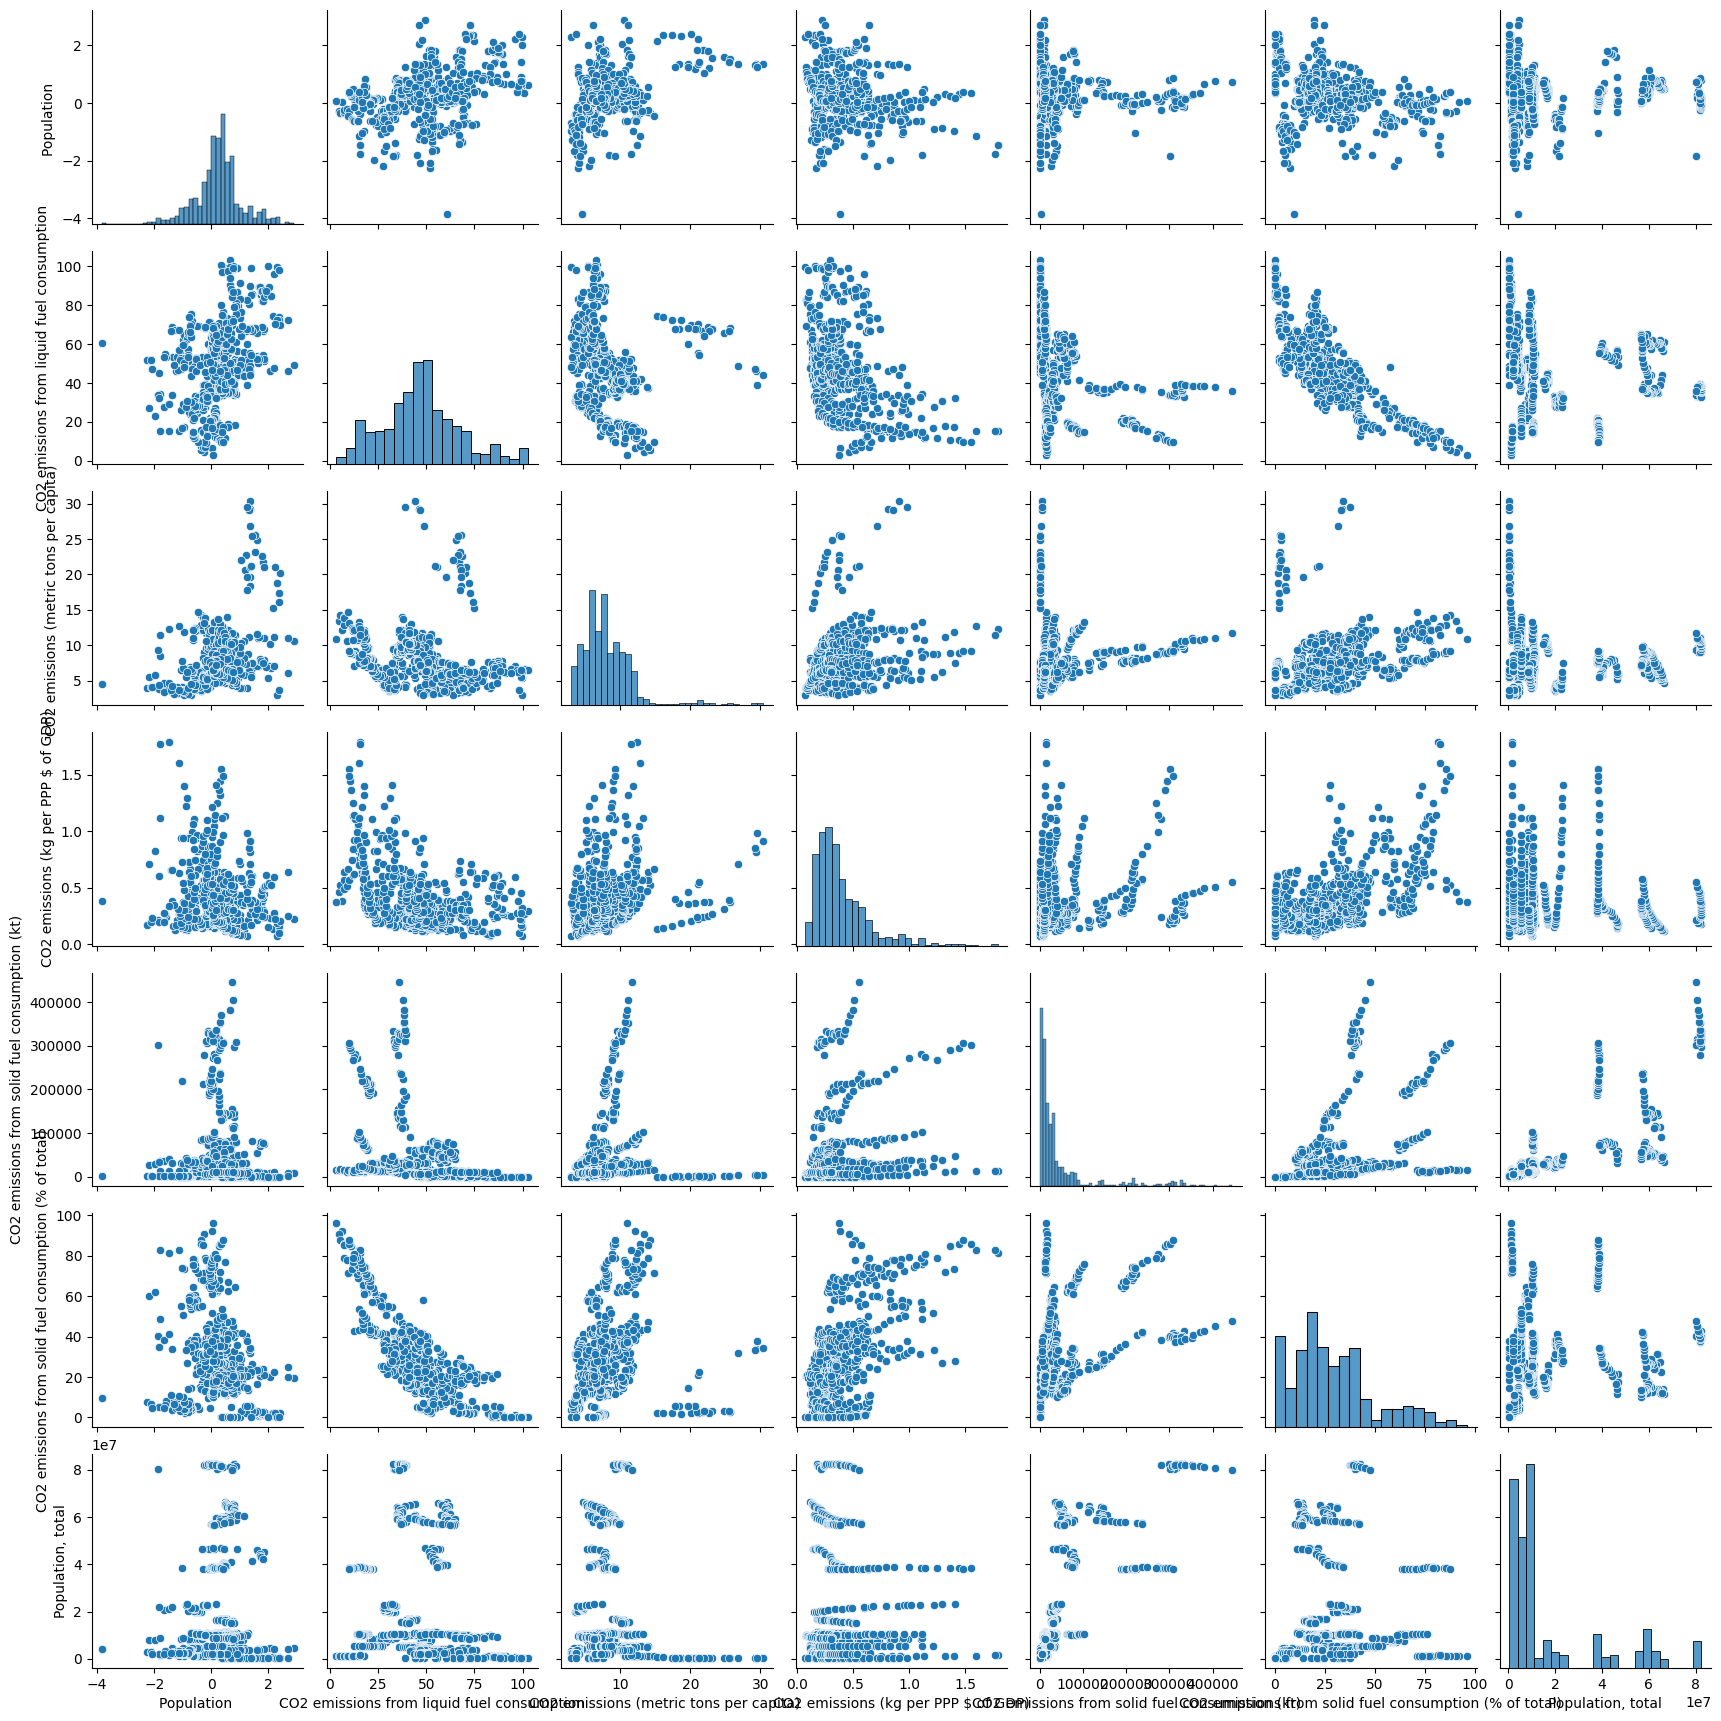

In [157]:
sns.pairplot(dtframe2)

<Axes: xlabel='CO2 emissions from liquid fuel consumption', ylabel='Population, total'>

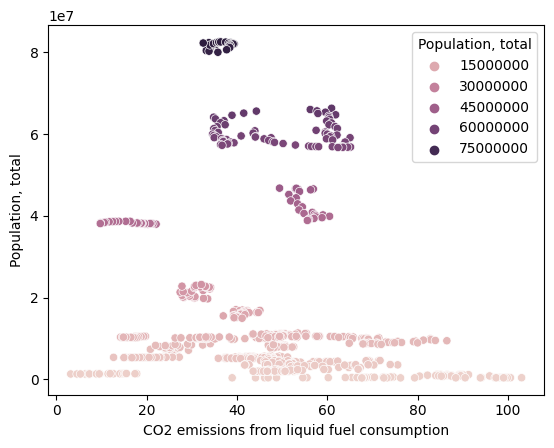

In [159]:
sns.scatterplot(x='CO2 emissions from liquid fuel consumption', y='Population, total', data=dtframe2, hue='Population, total')

<Axes: xlabel='CO2 emissions (metric tons per capita) ', ylabel='Population, total'>

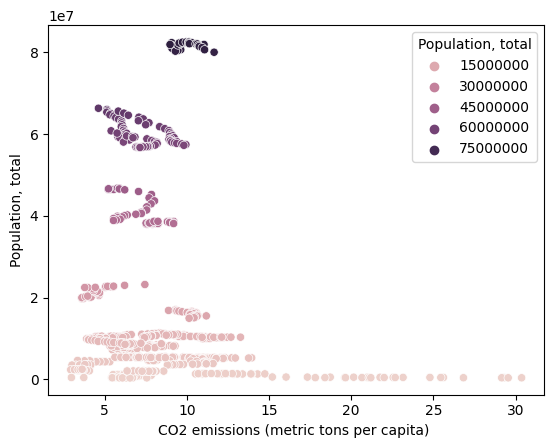

In [163]:
sns.scatterplot(x='CO2 emissions (metric tons per capita) ', y='Population, total', data=dtframe2, hue='Population, total')

<Axes: xlabel='CO2 emissions (kg per PPP $ of GDP)', ylabel='Population, total'>

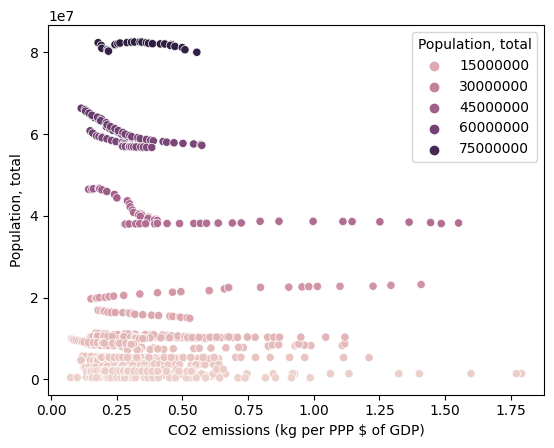

In [164]:
sns.scatterplot(x='CO2 emissions (kg per PPP $ of GDP)', y='Population, total', data=dtframe2, hue='Population, total')

<ipython-input-165-69960260a5d3>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dtframe2['Population, total'], shade=True, color='green')


<Axes: xlabel='Population, total', ylabel='Density'>

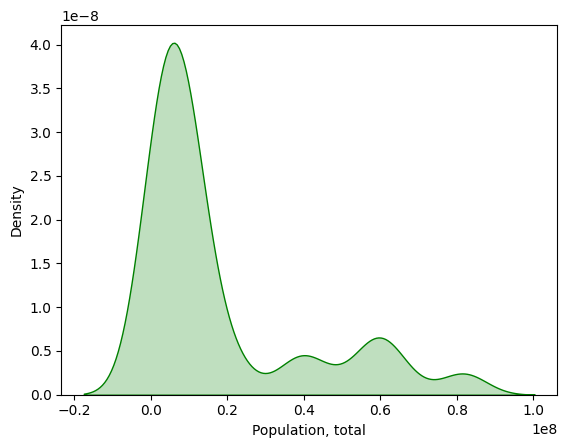

In [165]:
sns.kdeplot(dtframe2['Population, total'], shade=True, color='green')

Population                                                   Axes(0.125,0.653529;0.227941x0.226471)
CO2 emissions from liquid fuel consumption                Axes(0.398529,0.653529;0.227941x0.226471)
CO2 emissions (metric tons per capita)                    Axes(0.672059,0.653529;0.227941x0.226471)
CO2 emissions (kg per PPP $ of GDP)                          Axes(0.125,0.381765;0.227941x0.226471)
CO2 emissions from solid fuel consumption (kt)            Axes(0.398529,0.381765;0.227941x0.226471)
CO2 emissions from solid fuel consumption (% of total)    Axes(0.672059,0.381765;0.227941x0.226471)
Population, total                                                Axes(0.125,0.11;0.227941x0.226471)
dtype: object

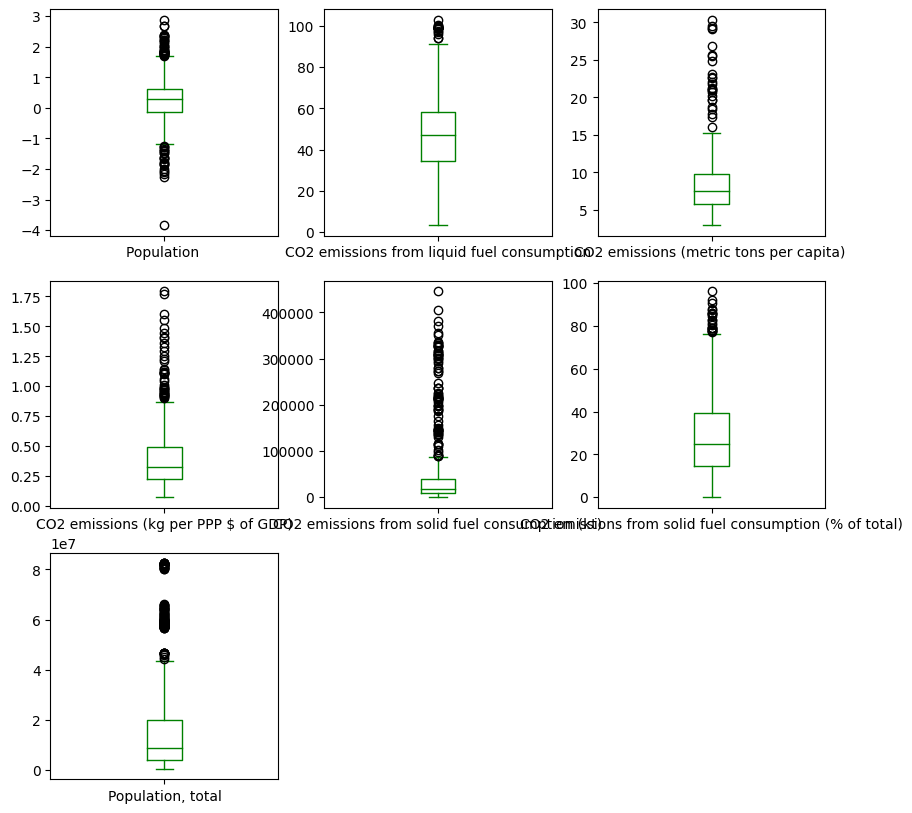

In [166]:
dtframe2.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10, 10), color='green')

In [40]:
dtframe2.squeeze()

,Country,Year,Population growth (annual %),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Total greenhouse gas emissions (% change from 1990),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total",text
13,Austria,2009,0.261953,0.038153,11.535759,7.592436,61.668376,18.612401,8343323.0,Austria2009
76,Belgium,2009,0.804600,0.001692,-4.904699,6.855889,0.365232,32.637018,10796493.0,Belgium2009
139,Bulgaria,2009,-0.644281,0.008553,-39.739798,49.793540,8.187631,4.627073,7444443.0,Bulgaria2009
265,Czechia,2009,0.569729,0.155746,-29.728582,59.571002,2.975549,1.194385,10443936.0,Czechia2009
328,Germany,2009,-0.253383,0.032825,-24.330622,44.113559,3.225779,13.919107,81902307.0,Germany2009
391,Denmark,2009,0.535079,0.000000,-13.067732,48.613363,0.052222,18.335486,5523095.0,Denmark2009
454,Spain,2009,0.885736,0.729194,27.094370,12.655678,9.048923,36.915877,46362946.0,Spain2009
517,Estonia,2009,-0.192768,0.000000,-66.272605,4.533546,0.364506,1.230208,1334515.0,Estonia2009
580,Finland,2009,0.478246,0.000387,-0.742737,16.088748,17.602575,13.588367,5338871.0,Finland2009
643,France,2009,0.513103,0.005718,-4.896381,4.526225,10.740715,3.863657,64710879.0,France2009


In [41]:
series=dtframe2.squeeze()

In [42]:
ser = dtframe2.iloc[:,0]

In [43]:
print(type(ser))

<class 'pandas.core.series.Series'>


In [44]:
dtframe2

,Country,Year,Population growth (annual %),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Total greenhouse gas emissions (% change from 1990),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),"Population, total",text
13,Austria,2009,0.261953,0.038153,11.535759,7.592436,61.668376,18.612401,8343323.0,Austria2009
76,Belgium,2009,0.804600,0.001692,-4.904699,6.855889,0.365232,32.637018,10796493.0,Belgium2009
139,Bulgaria,2009,-0.644281,0.008553,-39.739798,49.793540,8.187631,4.627073,7444443.0,Bulgaria2009
265,Czechia,2009,0.569729,0.155746,-29.728582,59.571002,2.975549,1.194385,10443936.0,Czechia2009
328,Germany,2009,-0.253383,0.032825,-24.330622,44.113559,3.225779,13.919107,81902307.0,Germany2009
391,Denmark,2009,0.535079,0.000000,-13.067732,48.613363,0.052222,18.335486,5523095.0,Denmark2009
454,Spain,2009,0.885736,0.729194,27.094370,12.655678,9.048923,36.915877,46362946.0,Spain2009
517,Estonia,2009,-0.192768,0.000000,-66.272605,4.533546,0.364506,1.230208,1334515.0,Estonia2009
580,Finland,2009,0.478246,0.000387,-0.742737,16.088748,17.602575,13.588367,5338871.0,Finland2009
643,France,2009,0.513103,0.005718,-4.896381,4.526225,10.740715,3.863657,64710879.0,France2009
